# ML - PROJECT GOLF

## Imports

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

## Read Data & drop `NaN`

In [237]:
golf = pd.read_csv("PGATOUR_data2.csv")
golf = golf.sort_index(axis=1)
golf.dropna(how="all", inplace=True)
golf.reset_index(inplace=True,drop=True)
#for i in golf.columns:
#    print(i)

## Select columns of (assumed) interest

In [238]:
interest = """
            NUMBER_OF_WINS
            NUMBER_OF_TOP_Tens
            PAR_OR_BETTER
            AVG_Driving_DISTANCE
            GIR_RANK
            AGE
            TOTAL_3_PUTTS
            ATTEMPTS_GFG
            UP_AND_DOWN_%
            ROUGH_TENDNECY%
            SAND_SAVE%
            FAIRWAY_HIT_%
            TOTAL_SG:PUTTING
            SG:APR
            SG:ARG
            SG:OTT
            MISSED_GIR
            AVG_SCORE
            POINTS
            
            """.split()

interest.sort()
df = golf[interest].copy()

## Attempts at drawing some meaning from this
First by not incorprating PCA

## Run tests of various scaler methods to see if one is significantly better than others

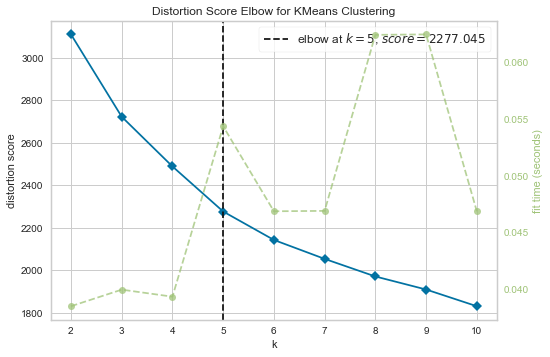

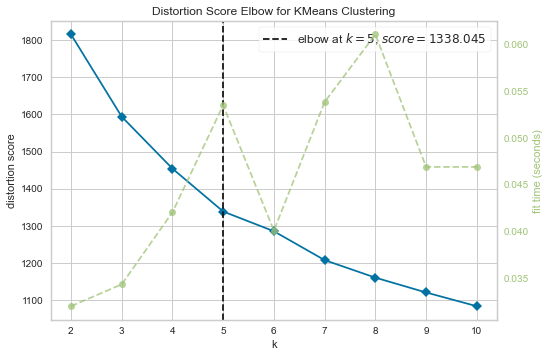

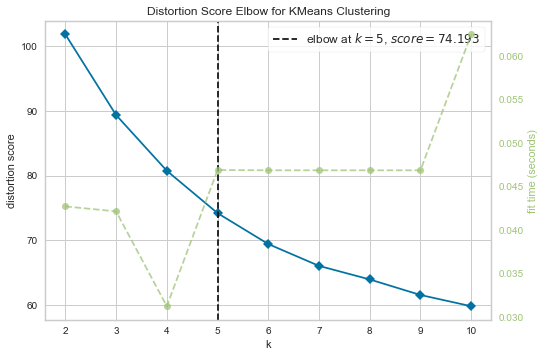

In [231]:
scalers = [StandardScaler(), RobustScaler(), MinMaxScaler()]

for i in scalers:
    scaler = i
    cluster=KMeans()
    pipe = make_pipeline(scaler,KElbowVisualizer(cluster))
    pipe.fit(df)
    pipe[1].show()
    plt.show()

There seems to be no significant difference in score reduction. Given my prior knowledge that golf data tends to be normally distributed we will choose the StandardScaler so that the number of groups is even, which (hopefully) will give 3 good and 3 bad groups of players.

In [239]:
scaler = StandardScaler()
cluster = KMeans(n_clusters=5)
pipe = make_pipeline(scaler, cluster)
pipe.fit(df)
labels = pipe['kmeans'].labels_

In [240]:
df["labels"] = labels
df.to_csv("labeled_golf_data.csv")

# Sort the dataframe according to number of top 10s

In [234]:
# Make a function to rename the clusters

def mapper(inp):
    dick = {
        4:"1. Top 20%",
        3:"2. Top 40%",
        2:"3. Average",
        1:"4. Bottom 40%",
        0:"5. Bottom 20%"
    }
    lst = list(inp)
    out = []
    for i in lst:
        out.append(dick[i])
    return pd.Series(out)
        
S = mapper(df.labels)

In [235]:
df["group"] = S
df = df.sort_values(by="group",ascending=True)
df

,AGE,ATTEMPTS_GFG,AVG_Driving_DISTANCE,AVG_SCORE,FAIRWAY_HIT_%,GIR_RANK,MISSED_GIR,NUMBER_OF_TOP_Tens,NUMBER_OF_WINS,PAR_OR_BETTER,...,ROUGH_TENDNECY%,SAND_SAVE%,SG:APR,SG:ARG,SG:OTT,TOTAL_3_PUTTS,TOTAL_SG:PUTTING,UP_AND_DOWN_%,labels,group
177,41.0,184.0,315.9,71.252,54.73,92.0,480.0,2.0,0.0,250.0,...,33.47,49.65,-0.240,-0.279,0.379,54.0,-3.415,52.08,4,1. Top 20%
35,28.0,154.0,308.6,70.190,59.29,62.0,437.0,4.0,0.0,276.0,...,29.41,51.24,0.508,0.202,0.477,42.0,-11.512,63.16,4,1. Top 20%
36,26.0,157.0,292.6,70.457,68.57,5.0,491.0,2.0,0.0,278.0,...,22.74,40.15,0.287,0.065,0.228,47.0,-4.618,56.62,4,1. Top 20%
88,32.0,154.0,295.8,70.578,66.36,41.0,477.0,3.0,0.0,302.0,...,24.97,51.85,0.382,-0.004,0.300,55.0,-19.675,63.31,4,1. Top 20%
85,35.0,158.0,303.1,71.275,57.19,119.0,528.0,1.0,0.0,312.0,...,31.73,40.37,-0.078,-0.124,0.311,56.0,-8.136,59.09,4,1. Top 20%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,27.0,124.0,301.0,72.112,55.45,177.0,439.0,0.0,0.0,234.0,...,33.29,48.72,-0.696,-0.111,-0.212,32.0,10.838,53.30,0,5. Bottom 20%
92,30.0,105.0,293.1,72.134,60.30,180.0,417.0,0.0,0.0,237.0,...,30.65,52.13,-0.563,0.196,-0.424,31.0,11.722,56.83,0,5. Bottom 20%
41,34.0,95.0,299.5,71.349,54.86,183.0,387.0,3.0,0.0,226.0,...,32.36,48.87,-0.092,-0.038,-0.075,31.0,1.932,58.40,0,5. Bottom 20%
58,27.0,134.0,289.1,71.827,53.27,190.0,571.0,1.0,0.0,314.0,...,33.65,43.62,-0.365,-0.048,-0.757,41.0,24.663,54.99,0,5. Bottom 20%


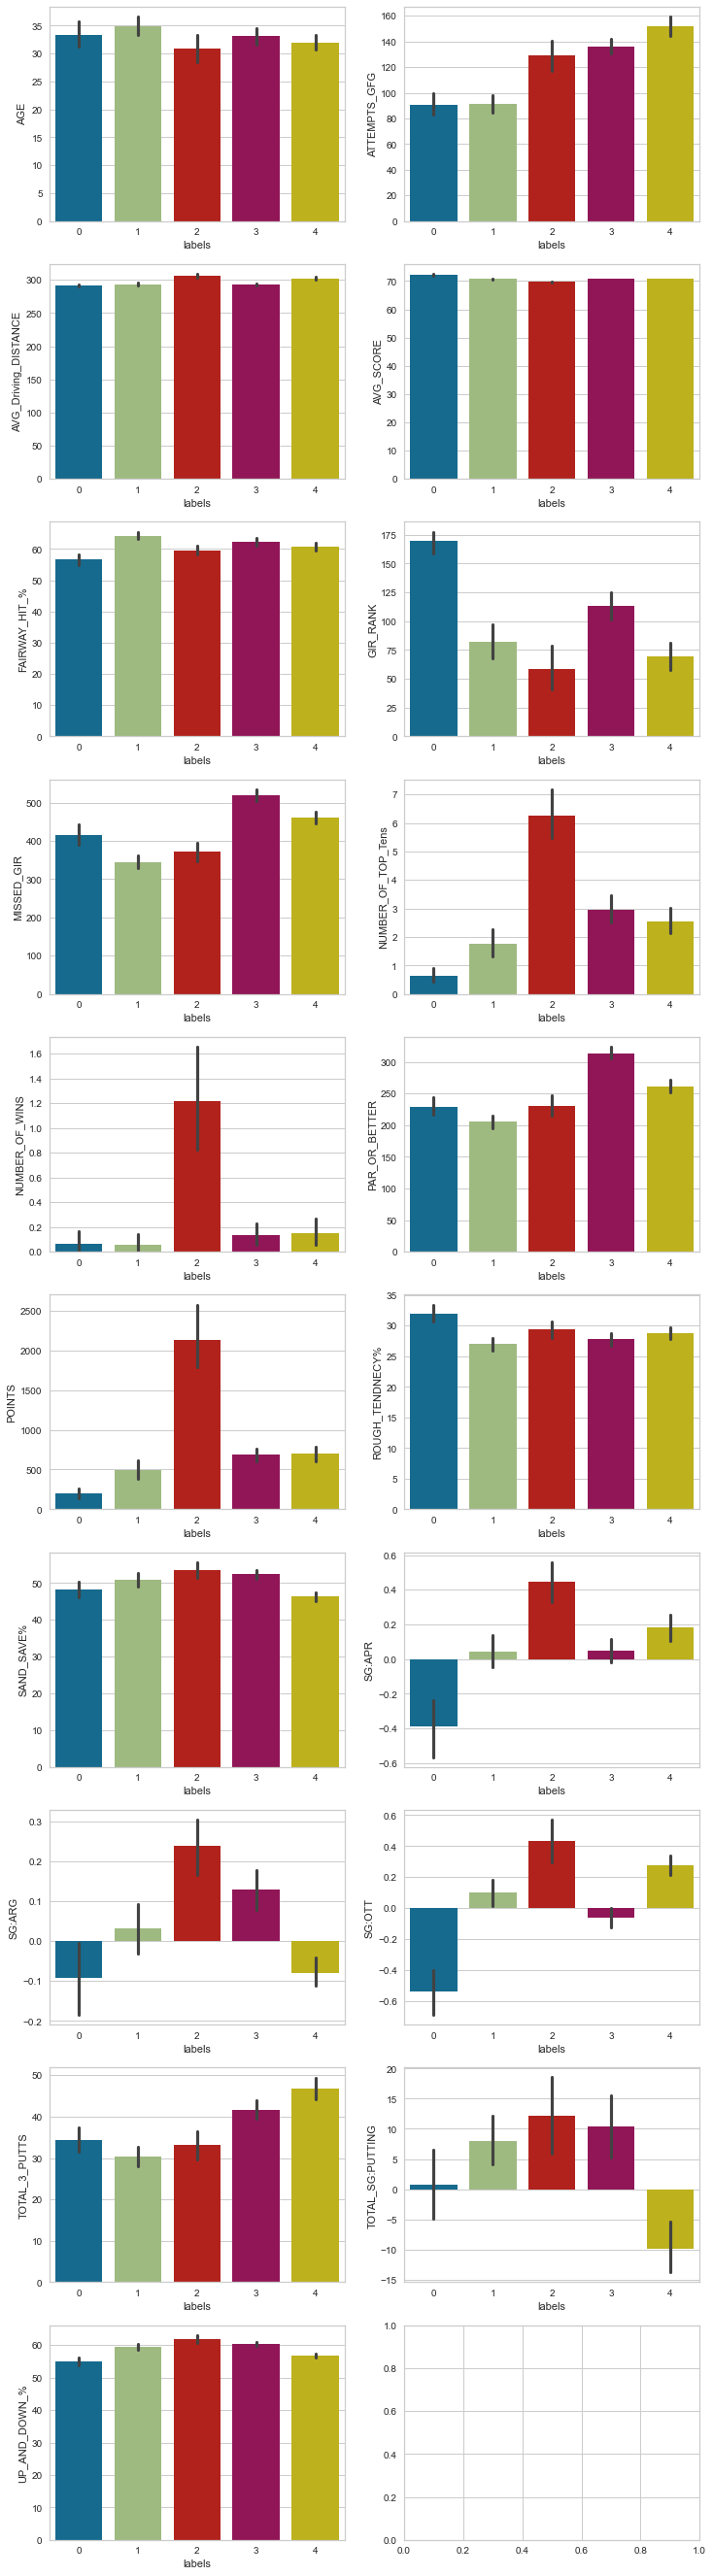

In [236]:
import math
rows = math.ceil(len(interest)/2)

fig, ax = plt.subplots(rows,2,figsize=(12,48))

for i, axis in zip(interest,ax.flat):
    sns.barplot(data = df, x = "labels", y = i, ax = axis)
    axis.set

Looks like the group with the maximum number of wins contains roughly the people we would expect to see there, which seems good. Bryson is however missing from this group.

# Lets do a PCA and see how the groups stand out there

In [125]:
golf_pca = golf.copy()
df_pca = df.copy()

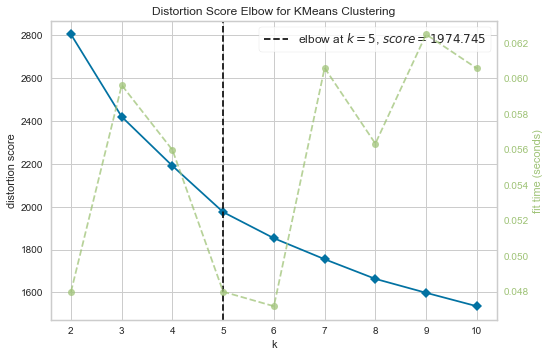

In [126]:
decomp = PCA(n_components=0.9)
cluster = KElbowVisualizer(KMeans())
pipe = make_pipeline(scaler, decomp, cluster)
pipe.fit(df_pca)
pipe[2].show()
plt.show()

# We will set the number of clusters to 6 once again.

In [127]:
cluster = KMeans(n_clusters=6)
pipe = make_pipeline(scaler, decomp, cluster)
pipe.fit(df_pca)
labels = pipe['kmeans'].labels_
pipe['pca'].explained_variance_ratio_.cumsum()

array([0.27795696, 0.44073602, 0.58547918, 0.71184984, 0.77525624,
       0.82320332, 0.86109132, 0.89400366, 0.91779001])

In [128]:
golf_pca["labels"] = labels

In [129]:
values = pipe[:2].transform(df)

In [130]:
pca_vals = ["PC"+str(i) for i in range(1,10)]
pca_vals

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [131]:
golf_pca = golf_pca.join(pd.DataFrame(values, columns=pca_vals))

In [132]:
golf_pca

,AGE,ATTEMPTS_GFG,AVG_BALL_SPEED,AVG_CARRY_DISTANCE,AVG_CLUB_HEAD_SPEED,AVG_Driving_DISTANCE,AVG_HANG_TIME,AVG_LAUNCH_ANGLE,AVG_SCORE,AVG_SMASH_FACTOR,...,labels,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,37.0,139.0,170.68,278.2,113.89,295.5,6.2,14.71,70.850,1.498,...,3,0.919718,0.971169,-2.982873,1.288639,-2.667763,0.352887,0.588512,-0.047438,0.850830
1,22.0,157.0,171.87,282.5,114.40,303.4,6.5,13.96,70.276,1.502,...,4,-2.381628,-1.485978,0.544680,0.307973,1.785342,-1.075907,0.654358,0.440588,-0.610872
2,27.0,179.0,167.57,275.1,111.85,296.3,6.4,13.94,70.659,1.498,...,3,-1.570131,-1.762353,-2.193088,-0.810189,-0.106946,-0.719960,0.022987,0.582168,0.361424
3,30.0,146.0,168.20,277.7,111.69,289.7,6.5,13.67,70.750,1.506,...,4,-0.983146,-0.142881,-0.494274,-1.596825,0.506411,-0.435236,0.444373,-0.591846,0.515476
4,26.0,151.0,177.58,283.0,120.59,305.5,6.5,13.47,71.370,1.472,...,0,1.199481,-2.248456,0.516719,1.189135,0.369329,-1.142354,-0.170722,-0.600227,-0.198020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,24.0,169.0,174.20,289.7,117.39,304.6,6.7,7.72,70.547,1.484,...,0,-1.139235,-2.094214,-0.857496,0.471061,0.635963,-0.783139,-0.021954,-0.011120,0.822634
191,31.0,129.0,169.29,280.2,114.95,298.7,6.3,7.72,71.486,1.472,...,4,0.920986,-1.941251,1.031074,-1.338457,-0.478499,-0.537653,0.445136,1.650538,-0.317426
192,29.0,74.0,158.44,259.8,107.90,279.5,6.4,7.52,71.215,1.468,...,5,1.538027,3.516874,-0.725126,-0.245172,-0.816789,-1.151091,1.795403,-0.273879,-0.419215
193,42.0,106.0,164.14,269.5,110.00,290.1,6.2,7.14,69.911,1.492,...,3,-1.081799,1.817666,-0.970825,-1.661707,-1.011281,0.678788,-0.394241,-0.811569,0.348516


In [133]:
# Make a 3D plot to see what it looks like

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

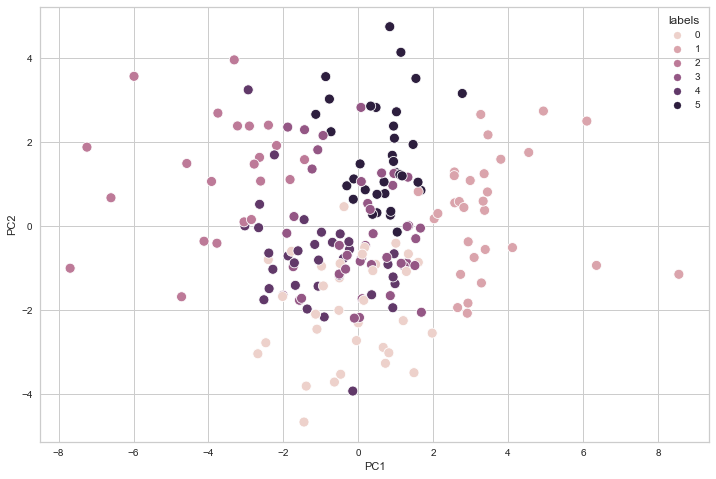

In [134]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=golf_pca, x="PC1", y="PC2", hue="labels", s=100)

In [136]:
golf.loc[golf.labels==4][["Player"]]

,Player
31,Brooks Koepka
32,Bryson DeChambeau
33,Bubba Watson
60,Dustin Johnson
64,Francesco Molinari
72,Hideki Matsuyama
82,Jason Day
91,Jon Rahm
95,Jordan Spieth
96,Justin Rose


In [78]:
golf["Player"].head(60)

0         Aaron Baddeley
1             Aaron Wise
2          Abraham Ancer
3            Adam Hadwin
4            Adam Schenk
5             Adam Scott
6             Alex Cejka
7             Alex Noren
8          Andrew Landry
9          Andrew Putnam
10            Andrew Yun
11        Anirban Lahiri
12           Austin Cook
13          Beau Hossler
14             Ben Crane
15            Ben Martin
16         Ben Silverman
17             Bill Haas
18        Billy Horschel
19      Billy Hurley III
20         Blayne Barber
21         Branden Grace
22       Brandon Harkins
23       Brandt Snedeker
24        Brendan Steele
25       Brett Stegmaier
26             Brian Gay
27          Brian Harman
28          Brian Stuard
29         Brice Garnett
30       Bronson Burgoon
31         Brooks Koepka
32          Bubba Watson
33            Bud Cauley
34         Byeong Hun An
35              C.T. Pan
36         Cameron Percy
37         Cameron Smith
38      Cameron Tringale
39         Chad Campbell


In [142]:
golf.loc[golf.Player=="Tiger Woods"]["NUMBER_OF_TOP_Tens"]

175    5.0
Name: NUMBER_OF_TOP_Tens, dtype: float64